In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
# df = pd.read_csv("credit_card_resampled.csv", delimiter=",")
# new_column_names = {f'F{i}': f'V{i}' for i in range(1, 29)}
# df.rename(columns=new_column_names, inplace=True)

In [2]:
df = pd.read_csv("credit_card_resampled.csv", delimiter=",")
df

,Time,Fraud,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1000,0,1.1646,0.2688,0.4837,1.2669,-0.6032,-1.2784,0.2192,-0.2401,...,-0.1543,0.0689,0.1658,-0.0453,0.9155,0.5890,-0.3618,0.0066,0.0283,26.00
1,100004,0,-0.8044,-0.6389,2.1726,0.3699,0.6768,-0.0729,-0.8398,0.1802,...,0.2084,-0.0858,-0.0964,0.1114,0.5109,-0.6930,0.4495,-0.0893,-0.0534,7.99
2,100004,0,1.9701,0.1128,-1.6184,1.4330,0.5694,-0.6166,0.3718,-0.2556,...,-0.3728,-0.0742,0.1108,-0.0444,-0.4894,0.3921,-0.5226,-0.0590,-0.0814,29.70
3,10002,0,1.1253,0.0365,1.5509,1.6339,-1.1273,-0.3607,-0.6802,0.0205,...,-0.2189,-0.1959,-0.1486,0.0512,0.6324,0.3265,-0.4659,0.0417,0.0345,12.99
4,100056,0,-0.7382,1.5144,-0.3854,-1.1399,2.1153,-0.7778,1.9227,-0.6532,...,-0.0680,0.1239,0.6085,-0.9106,0.1542,1.6453,0.5289,-0.3769,0.0159,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46062,99940,0,-2.9505,-1.3008,1.4213,3.1341,4.6046,-1.7730,-0.5619,0.1291,...,0.5736,0.3972,0.4440,-0.2019,-0.3714,1.4410,0.2931,-0.1886,0.0735,1.00
46063,99941,0,-0.0653,1.1000,-0.1675,0.3279,1.4563,-0.2974,1.3057,-0.1795,...,-0.2785,0.0954,0.5965,-0.1437,0.6373,-0.3937,-0.7502,0.1830,0.2144,12.99
46064,99941,0,2.0346,0.2354,-1.5332,0.9868,0.1850,-1.1618,0.0175,-0.3767,...,-0.2089,-0.1832,0.0454,0.0374,-0.1484,0.0811,0.6010,-0.0667,-0.0363,6.99
46065,9996,0,1.1559,0.1535,0.9997,2.6434,0.0707,1.5187,-0.7705,0.3757,...,-0.2484,-0.4216,-0.7762,-0.0647,-1.4290,0.3744,-0.0107,0.0227,0.0094,11.38


In [1255]:
# len(df[df['Fraud']==1])

In [308]:
# df.describe()

In [306]:
# df.info()

In [307]:
# df.shape

# Exploratory Data Analysis

## Check for duplicates

## Data with Fraud and Amount = 0.0

In [6]:
print(len(df[(df['Fraud'] == 1) & (df['Amount'] == 0.0)]))
# print(df[(df['Fraud'] == 1) & (df['Amount'] == 0.0)])
print(len(df[df['Fraud'] == 0]))

25
45601


In [7]:
(df[df['Fraud'] == 1]['Amount']).describe()


count     466.000000
mean      123.449871
std       260.592632
min         0.000000
25%         1.000000
50%         9.555000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
len(df[(df['Amount'] <= 1.0) & (df['Fraud'] == 1)])

169

Fraud
0    45601
1      466
Name: count, dtype: int64


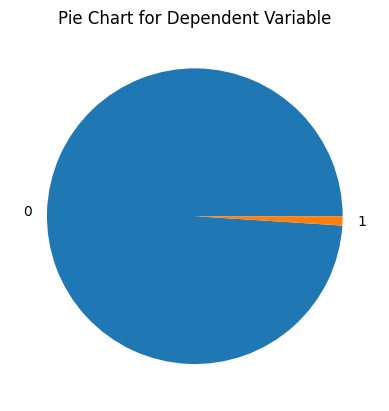

In [9]:
plt.pie(df['Fraud'].value_counts(), labels=[0, 1])
plt.title('Pie Chart for Dependent Variable');
print(df['Fraud'].value_counts())
plt.show()

# Detecting number of missing values

<Axes: >

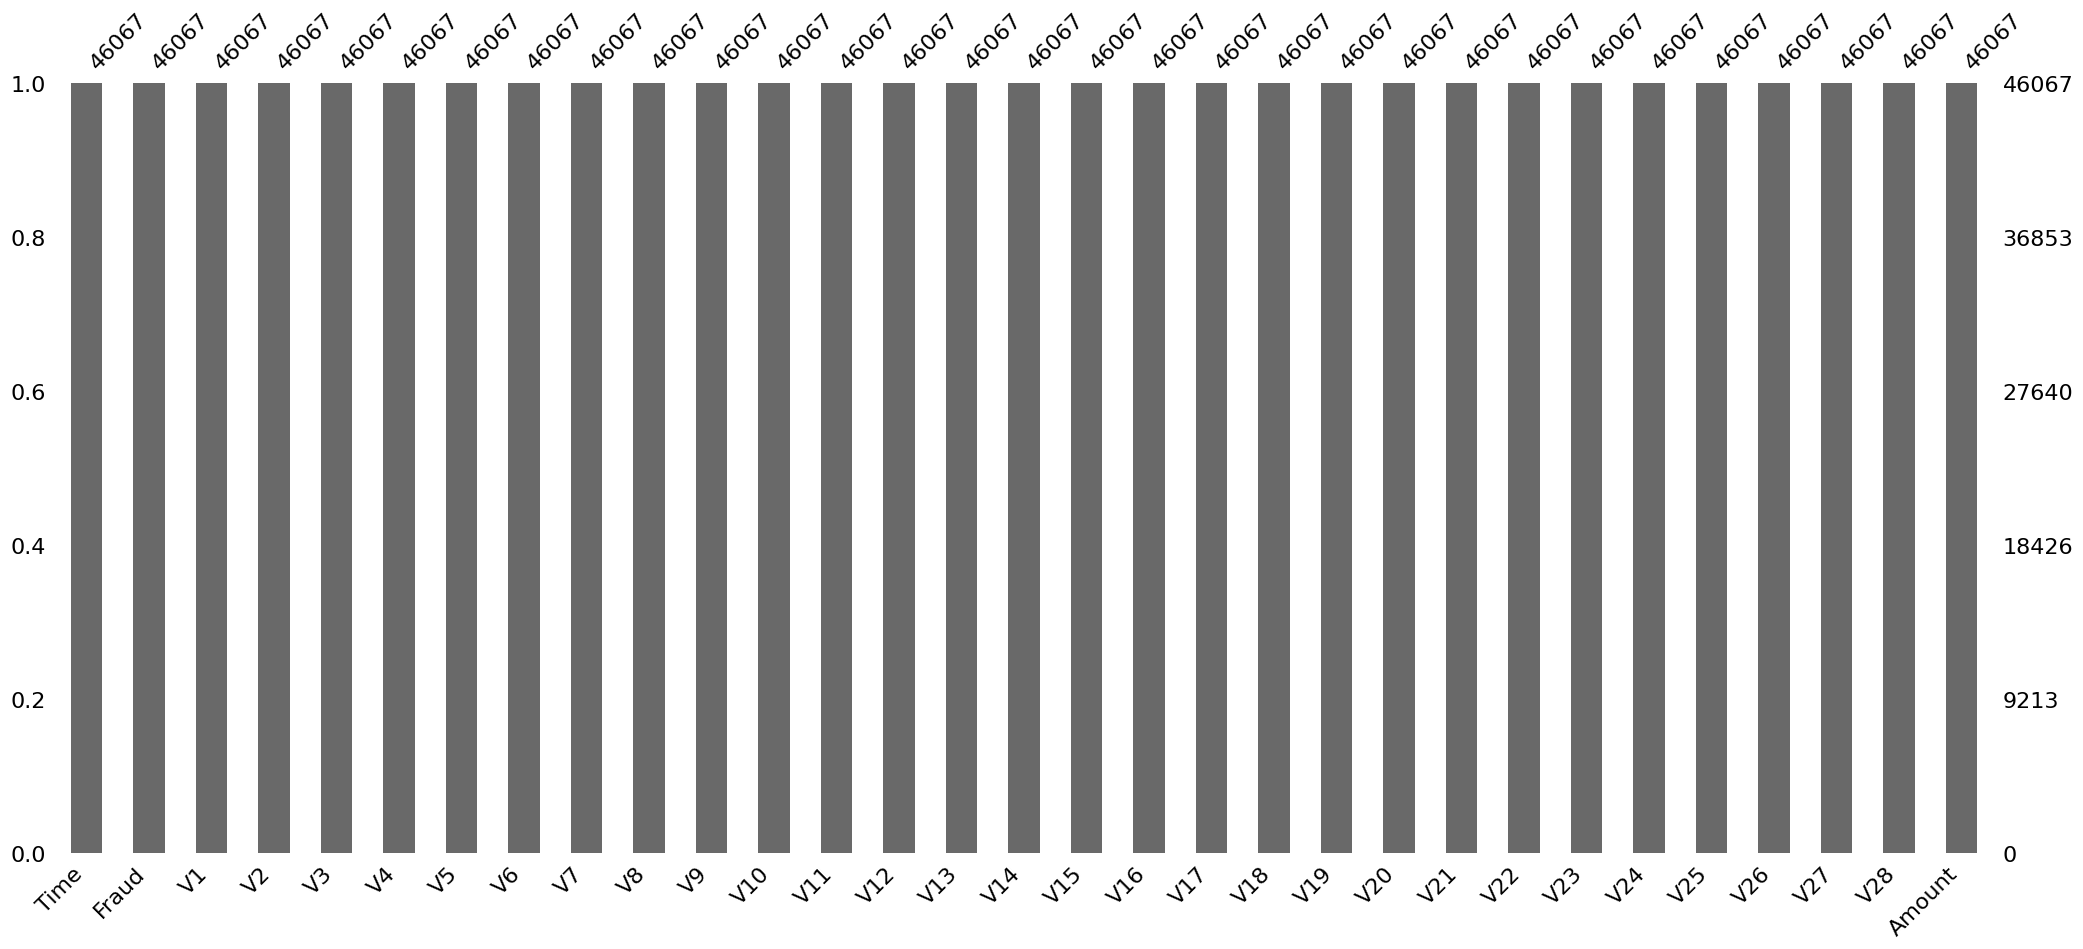

In [10]:
import missingno as msno 
msno.bar(df)


on the top of the bar we see number of non missing values and on the right side we see the percentage of the non missing values

In [11]:
num_col = df.select_dtypes(exclude='object').columns
fraud_data_df = df[num_col]
del fraud_data_df['Fraud']

## linearly correlation analysis using Heat Map

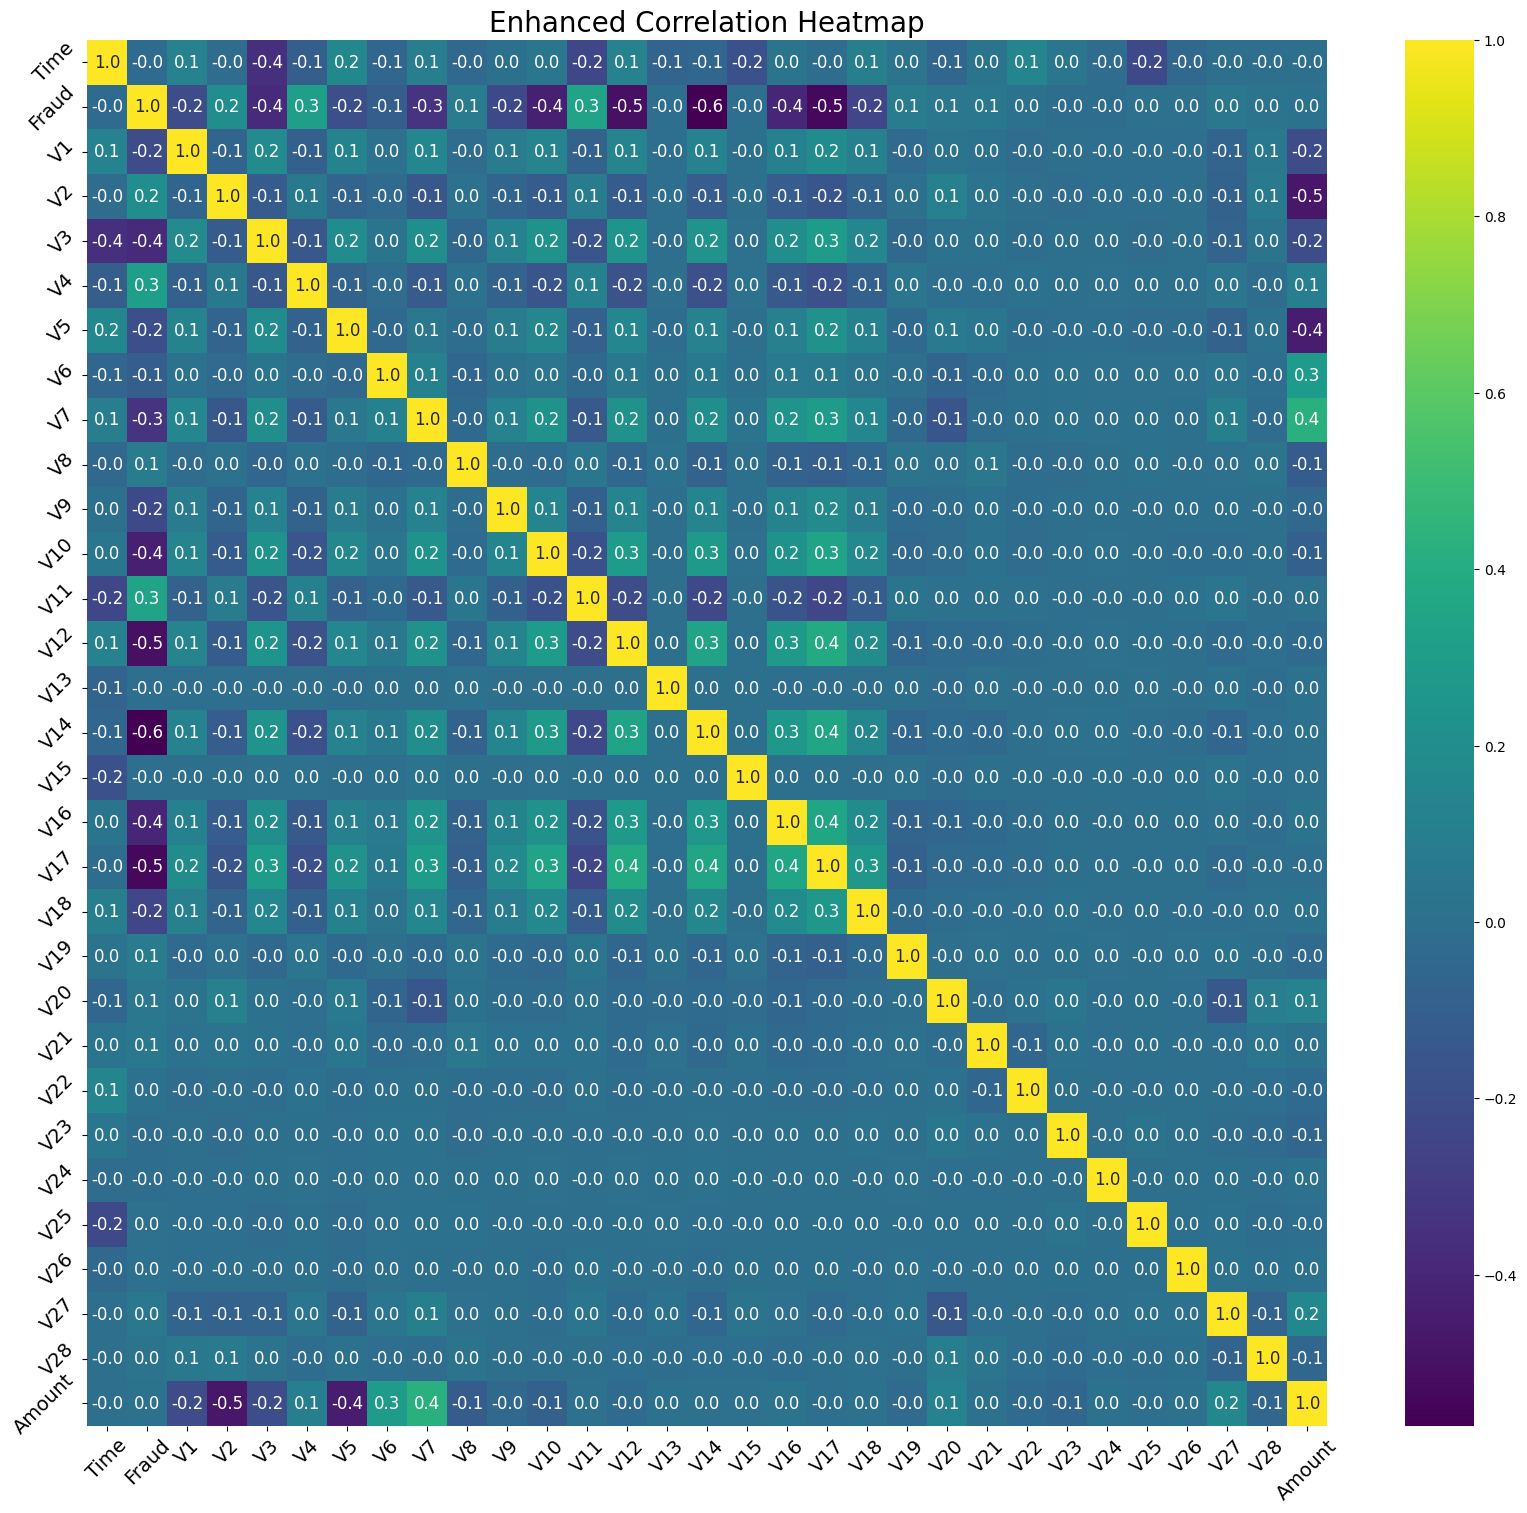

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
corrmat = df.corr()

plt.figure(figsize=(20, 18))  # Large figure size for clarity
heat_map = sns.heatmap(corrmat, annot=True, cmap="viridis", fmt='.1f', annot_kws={'size': 12})

# Enhancements for readability
plt.title("Enhanced Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=14, rotation=45)  # Rotate x labels for better visibility
plt.yticks(fontsize=14, rotation=45)  # Rotate y labels for better visibility
plt.show()


## Feature Importance using Random Forest classifier

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier




X = df.drop('Fraud', axis=1)
y = df['Fraud']


rf = RandomForestClassifier()


rf.fit(X, y)


feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


sorted_features = features_df.sort_values(by='Importance', ascending=False)




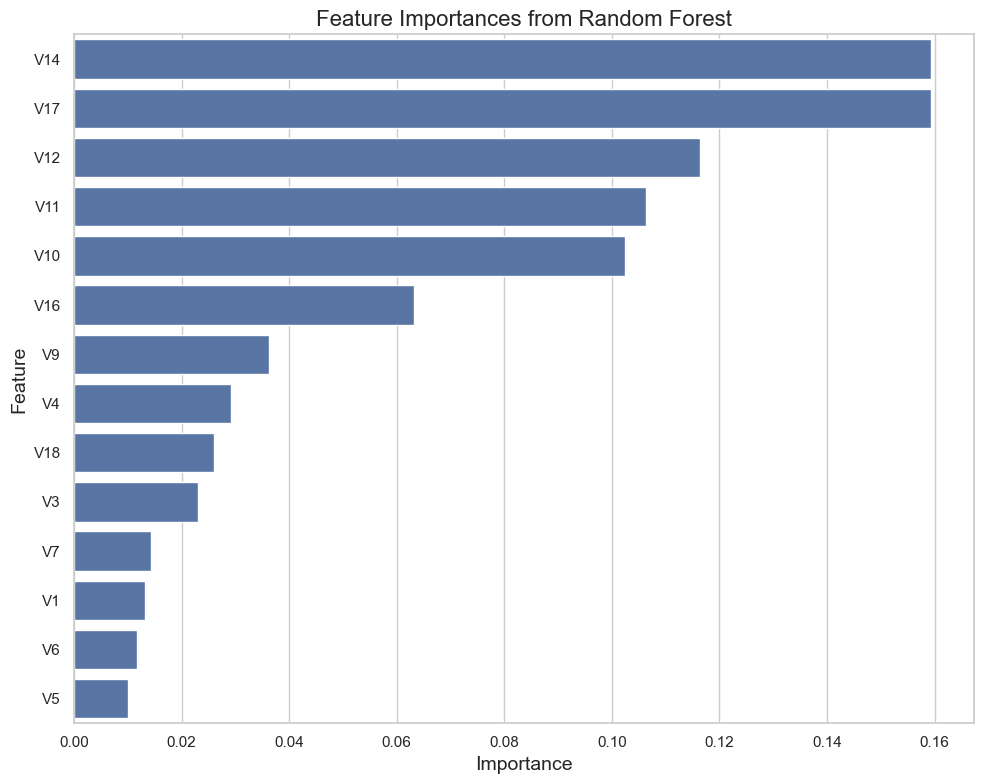

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Feature': ['V14', 'V17', 'V12', 'V11', 'V10', 'V16', 'V9', 'V4', 'V18', 'V3', 'V7', 'V1', 'V6', 'V5']
,
    'Importance': [0.159357, 0.159305, 0.116412, 0.106412, 0.102447, 0.063255, 0.036294, 0.029108, 0.026020, 0.023007, 0.014356, 0.013202, 0.011770, 0.010101]
}
sorted_features = pd.DataFrame(data)


sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Importance", y="Feature", data=sorted_features)


ax.set_title('Feature Importances from Random Forest', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)


plt.tight_layout()
plt.show()


## K Best Features using highest ANOVA F-values

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif


bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)



dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  

print(featureScores.nlargest(20,'Score'))


   Feature         Score
14     V14  22315.063745
17     V17  18578.950014
12     V12  15897.603335
10     V10  10629.384249
16     V16   8838.206845
3       V3   7953.158503
11     V11   6044.963840
7       V7   5905.813729
4       V4   4611.703541
18     V18   2907.916758
9       V9   2425.100582
1       V1   2230.260294
2       V2   1881.505763
5       V5   1747.416760
6       V6    513.427751
19     V19    318.063490
8       V8    251.930372
21     V21    162.572407
20     V20    125.816992
27     V27    112.443796


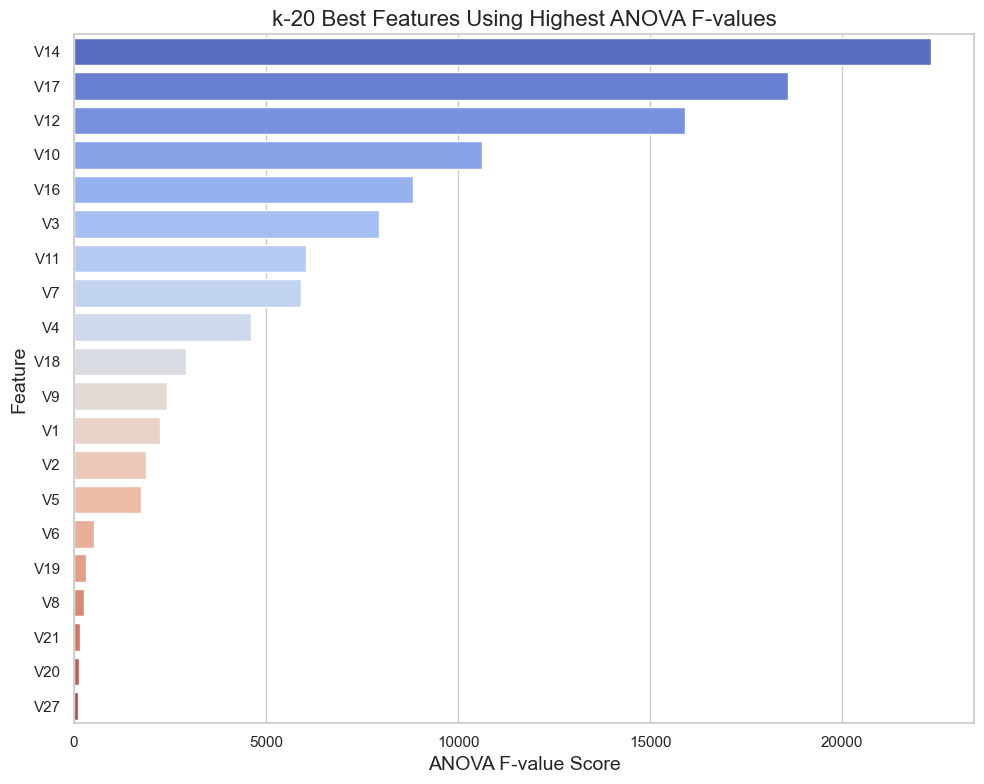

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Feature': ['V14', 'V17', 'V12', 'V10', 'V16', 'V3', 'V11', 'V7', 'V4', 'V18', 
 'V9', 'V1', 'V2', 'V5', 'V6', 'V19', 'V8', 'V21', 'V20', 'V27'],
    'Score': [22315.063745, 18578.950014, 15897.603335, 10629.384249, 8838.206845,
              7953.158503, 6044.963840, 5905.813729, 4611.703541, 2907.916758,
              2425.100582, 2230.260294, 1881.505763, 1747.416760, 513.427751,
              318.063490, 251.930372, 162.572407, 125.816992, 112.443796]
}
anova_features = pd.DataFrame(data)


sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Score", y="Feature", data=anova_features, palette="coolwarm")


ax.set_title('k-20 Best Features Using Highest ANOVA F-values', fontsize=16)
ax.set_xlabel('ANOVA F-value Score', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)


plt.tight_layout()
plt.show()


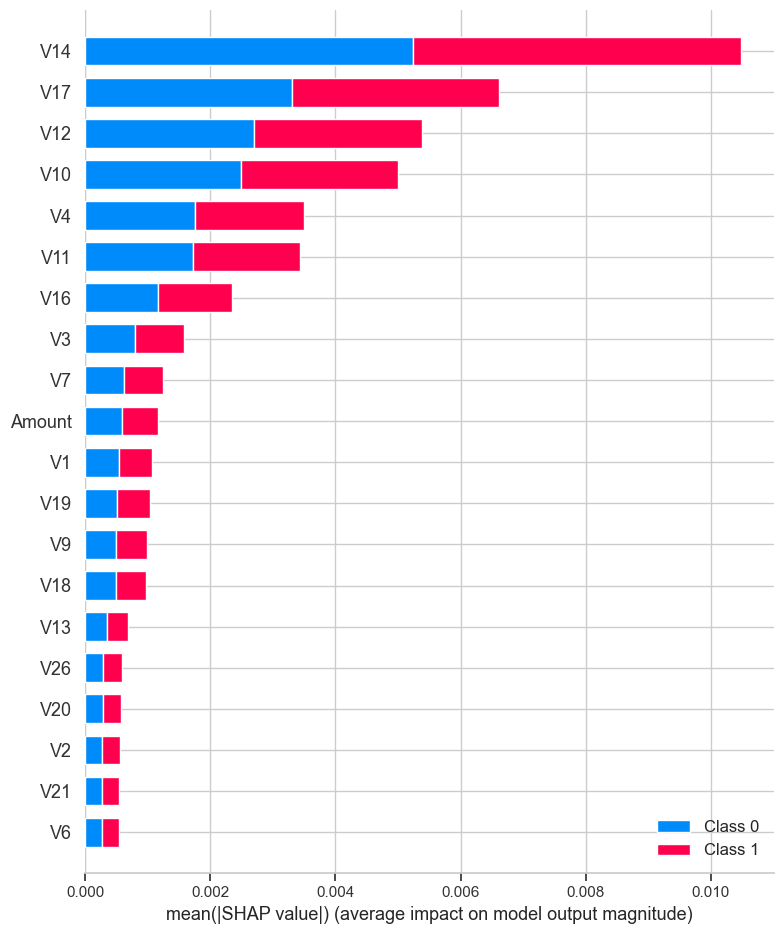

In [21]:
import shap
from sklearn.ensemble import RandomForestClassifier


X = df.drop('Fraud', axis=1)
y = df['Fraud']



rf = RandomForestClassifier()
rf.fit(X, y)


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)


shap.summary_plot(shap_values, X, plot_type="bar")

## Re-Sampling because of Imbalanced Dataset


Oversampling the minority class: Increase the number of instances in the minority class by replicating them or by generating synthetic samples using algorithms like SMOTE (Synthetic Minority Over-sampling Technique).
Undersampling the majority class: Reduce the number of instances in the majority class. This can be done randomly or by using clustering algorithms to maintain the distribution.
Algorithmic Ensemble Techniques:

Bagging: Use ensemble methods that aggregate the predictions of base estimators built with resampled subsets, like Random Forests.
Boosting: Use boosting algorithms like AdaBoost or Gradient Boosting that focus on examples that are hard to classify.
Algorithm-level Approaches:

Cost-sensitive Training: Adjust the algorithm's cost function to penalize misclassifications of the minority class more than the majority.
Use of Evaluation Metrics: Use metrics such as precision-recall curve, F1-score, or the Area Under the Precision-Recall Curve (AUPRC) instead of accuracy.
Data-level Approaches:

Anomaly Detection: In some cases, particularly when the minority class is very small, it might be more effective to treat the problem as an anomaly detection one rather than a classification problem.
Feature Engineering: Improve or add features that may help the model distinguish between classes better.
Hybrid Approaches:

Combine over and undersampling.
Use ensemble methods with resampling techniques within each iteration of the ensemble.
Customized Algorithms:

Some algorithms can be more tolerant of imbalanced data, such as decision trees. However, they might require careful tuning.
Use of Different Perspectives:

Sometimes, changing the perspective of the problem can help. For instance, instead of predicting the rare event, you might predict the non-occurrence of the common one.
Collect More Data

Here We will do undersampling for no loss of generality

### keep only selected features

# Feature selection

## Testing duplicate rows

### An example

### 1. Duplicate records

In [25]:
# df

In [26]:
# An example

original_data = df
selected_columns = ['V14', 'V17', 'V12', 'V10', 'V16', 'Fraud']  # Adjust the list to your specific columns
duplicates = original_data.duplicated(subset=selected_columns, keep=False)
duplicate_rows = original_data[duplicates]
duplicate_counts = duplicate_rows[selected_columns].value_counts()
row_counts = original_data[selected_columns].value_counts()
row_counts

# rows_with_count_16 = row_counts[row_counts == 16].index
# filtered_data = original_data[
#     original_data.set_index(selected_columns).index.isin(rows_with_count_16)
# ].reset_index(drop=True)
# print(filtered_data)

V14      V17      V12      V10      V16      Fraud
-0.5974   0.4739   0.1835  -0.3511   0.1787  0        16
 0.4070  -0.3747  -0.0735  -0.0446   0.3425  0        13
-0.7035   0.5494  -0.1747  -0.3620   0.3187  0        13
-1.1545   0.5369  -0.3224  -0.6521   0.8782  0        11
 2.4280   1.8222  -2.5255  -0.5183  -1.5323  0        10
                                                      ..
-0.2521  -0.6518   1.1914  -0.1722   0.6489  0         1
          0.4592   0.5620  -0.3312   0.0252  0         1
-0.2520  -0.8107  -0.0161  -0.7365   0.4151  0         1
         -0.7607   0.7198  -0.0043   0.5361  0         1
 7.4396   3.5489   0.9317   1.1413   2.1341  0         1
Name: count, Length: 45575, dtype: int64

### 2. Iconsistency check: If there rows with same selected features but different 'Fraud' value

In [27]:


def check_inconsistent_labels(df, feature_columns, target_column):
    """
    Check if there are rows with the same values for the selected features
    but different target values.

    Parameters:
    df (DataFrame): The original dataframe to check.
    feature_columns (list): List of columns to consider for feature values.
    target_column (str): The name of the target column.

    Returns:
    inconsistent_rows (DataFrame): A dataframe with rows that have the same feature values but different target values.
    """

    grouped = df.groupby(feature_columns)[target_column].nunique()
    

    inconsistent_groups = grouped[grouped > 1].index
    

    inconsistent_rows = df[df.set_index(feature_columns).index.isin(inconsistent_groups)].sort_values(by=feature_columns)
    
    return inconsistent_rows


selected_columns = ['V14', 'V17', 'V12', 'V10', 'V16']
inconsistent_data = check_inconsistent_labels(original_data, selected_columns, 'Amount')
print(inconsistent_data[selected_columns + ['Amount', 'Fraud']])



          V14     V17     V12     V10     V16  Amount  Fraud
3315  -1.0204  0.4045  0.5902 -0.4032  0.2912    0.89      0
7306  -1.0204  0.4045  0.5902 -0.4032  0.2912    0.99      0
13439 -0.9330  0.3939  0.3069 -0.3897  0.3433    1.98      0
15016 -0.9330  0.3939  0.3069 -0.3897  0.3433    1.79      0
24951 -0.6081  0.0027  0.6624 -0.3067 -0.5231    5.99      0
...       ...     ...     ...     ...     ...     ...    ...
13195  1.3125 -0.6545 -0.2915  0.2303 -0.1662    0.76      0
9364   1.3128 -0.6544 -0.2915  0.2297 -0.1661    1.89      0
9466   1.3128 -0.6544 -0.2915  0.2297 -0.1661    1.89      0
9722   1.3128 -0.6544 -0.2915  0.2297 -0.1661    1.89      0
13855  1.3128 -0.6544 -0.2915  0.2297 -0.1661    1.90      0

[87 rows x 7 columns]


In [28]:
amount_series = df['Amount']
selected_columns = ['V14', 'V17', 'V12', 'V10', 'V16','V11','Fraud','V3','V4','V9']
df = df[selected_columns]
df = df.drop_duplicates(subset=selected_columns)

# Undersampling of Majority Class

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (classification_report,
                            confusion_matrix, f1_score)

non_fraud_class = df[df['Fraud'] == 0]
fraud_class = df[df['Fraud'] == 1]

non_fraud_count,fraud_count= df['Fraud'].value_counts()
print('The number of observations in non_fraud_class:', non_fraud_count)
print('The number of observations in fraud_class:', fraud_count)

non_fraud_under = non_fraud_class.sample(fraud_count) 
under_sampled = pd.concat([non_fraud_under, fraud_class], axis=0) 
X_under = under_sampled.drop('Fraud',axis=1) 
y_under = under_sampled['Fraud']

X_train_under, X_test_under, y_train_under, y_test_under =\
                 train_test_split(X_under, y_under, random_state=0)

The number of observations in non_fraud_class: 45130
The number of observations in fraud_class: 466


# Supervised Learning Modeling for Fraud Examination

Logistic regression

Decision tree

Random forest

XGBoost

# Logistic Regression

Standardization (Z-score normalization) scales the data so that the distribution of each feature has a mean of 0 and a standard deviation of 1. This is particularly important for logistic regression, which can be sensitive to the scale of input features since it relies on gradient descent to find the optimal coefficients.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_under_scaled = scaler.fit_transform(X_test_under)

param_log = {'C': np.logspace(-4, 4, 4), 'penalty': ['l1', 'l2']}


log_grid = GridSearchCV(LogisticRegression(),
                        param_grid=param_log, n_jobs=-1)
log_grid.fit(X_train_under_scaled, y_train_under)
prediction_log = log_grid.predict(X_test_under_scaled)



In [33]:
conf_mat_log = confusion_matrix(y_true=y_test_under,
                                         y_pred=prediction_log)
print('Confusion matrix:\n', conf_mat_log)
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, prediction_log))

Confusion matrix:
 [[115   1]
 [ 10 107]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       116
           1       0.99      0.91      0.95       117

    accuracy                           0.95       233
   macro avg       0.96      0.95      0.95       233
weighted avg       0.96      0.95      0.95       233



# Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier

param_dt = {'max_depth': [3, 5, 10],
        'min_samples_split': [2, 4, 6],
        'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(),
        param_grid=param_dt, n_jobs=-1)
dt_grid.fit(X_train_under, y_train_under)
prediction_dt = dt_grid.predict(X_test_under)


In [35]:
conf_mat_dt = confusion_matrix(y_true=y_test_under,
                                        y_pred=prediction_dt)
print('Confusion matrix:\n', conf_mat_dt)
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, prediction_dt))

Confusion matrix:
 [[114   2]
 [ 12 105]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.98      0.90      0.94       117

    accuracy                           0.94       233
   macro avg       0.94      0.94      0.94       233
weighted avg       0.94      0.94      0.94       233



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {'n_estimators':[20,50,100] ,
                  'max_depth':[3,5,10],
                  'min_samples_split':[2,4,6],
                  'max_features':['auto', 'sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(),
                    param_grid=param_rf, n_jobs=-1)
rf_grid.fit(X_train_under, y_train_under)
prediction_rf = rf_grid.predict(X_test_under)

In [37]:
conf_mat_rf = confusion_matrix(y_true=y_test_under,
                                        y_pred=prediction_rf)
print('Confusion matrix:\n', conf_mat_rf)
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, prediction_rf))

Confusion matrix:
 [[115   1]
 [ 10 107]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       116
           1       0.99      0.91      0.95       117

    accuracy                           0.95       233
   macro avg       0.96      0.95      0.95       233
weighted avg       0.96      0.95      0.95       233



# XG Boost

In [38]:
from xgboost import XGBClassifier

param_boost = {'learning_rate': [0.01, 0.1],
                        'max_depth': [3, 5, 7],
                        'subsample': [0.5, 0.7],
                        'colsample_bytree': [0.5, 0.7],
                        'n_estimators': [10, 20, 30]}
boost_grid = RandomizedSearchCV(XGBClassifier(),
                                param_boost, n_jobs=-1)
boost_grid.fit(X_train_under, y_train_under)
prediction_boost = boost_grid.predict(X_test_under)

In [39]:
conf_mat_boost = confusion_matrix(y_true=y_test_under,
                                           y_pred=prediction_boost)
print('Confusion matrix:\n', conf_mat_boost)
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, prediction_boost))

Confusion matrix:
 [[115   1]
 [ 11 106]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       116
           1       0.99      0.91      0.95       117

    accuracy                           0.95       233
   macro avg       0.95      0.95      0.95       233
weighted avg       0.95      0.95      0.95       233



## Cost Sensitive Classifier Modelling

Confusion matrix:
 [[TN, FP]
 [FN, TP]]

false positive is less costly than a false negative

a false positive means blocking an already legitimate transaction.

Having failed to detect a real fraud, a company can incur large financial costs—including the transaction amount—not to mention costs stemming from any damage to its reputation

True Positives (TP): Fraudulent transactions that were correctly identified as fraud.
True Negatives (TN): Legitimate transactions that were correctly identified as not fraud.
False Positives (FP): Legitimate transactions that were incorrectly identified as fraud (Type I error).
False Negatives (FN): Fraudulent transactions that were incorrectly identified as not fraud (Type II error).

# Cost Based Analysis for Above approaches

The savings value represents the proportion of costs saved by using the predictive model 
�
f compared to the baseline model. A positive savings value indicates that the model 
�
f is more cost-effective than the baseline, while a negative savings value would indicate that the model is less cost-effective. It's a way to evaluate the model's economic impact rather than just its predictive accuracy.

# Calculating Cost and Savings Formula for different proportion of Frauds 

# Based on Fraud distribution in Data Cost Inferrence

In [40]:


 
def cost(ground_truth, model_predictions, data):
    '''
    This function is used to calculate the economic total cost when we have different costs for TP,TN and FP
    
    '''
    cost_fp = 1
    cost_tp = 0
    cost_tn = 0
    total_cost = 0


    for y_i, c_i, amount in zip(ground_truth, model_predictions, data['Amount']):
        if y_i == 1 and c_i == 1:
            # True Positive
            total_cost += cost_tp
        elif y_i == 0 and c_i == 1:
            # False Positive
            total_cost += cost_fp
        elif y_i == 1 and c_i == 0:
            # False Negative
            total_cost += amount # The cost is the transaction amount
        # True Negative does not contribute to the cost in this case (cost_tn = 0)

    return total_cost



def savings(ground_truth, model_predictions, data):
    '''
    This function is used to calculate the savings
    
    '''

    model_cost = cost(ground_truth, model_predictions, data)


    always_non_fraud_classifier_prediction = [0] * len(ground_truth)
    cost_always_non_fraud_class =  cost(data['Fraud'], always_non_fraud_classifier_prediction,data)


    # cost of a classifier that always predicts fraud or '1'

    always_fraud_classifier_prediction = [1] * len(ground_truth)
    cost_always_fraud_class= cost(data['Fraud'],always_fraud_classifier_prediction,data)

    minimum = min(cost_always_non_fraud_class,cost_always_fraud_class)
    savings_score = (model_cost - minimum)/minimum 
    return savings_score 


def cost_inferrence(data, model, desired_fraud_percentage):

    '''
    Input:
    data has to be unseen by the model therefore we will sample from X_test_under and Y_test_under 
    model is the classification models that we have trained

    Output:
    economical cost for different algorithms
    '''

    # Both are 50-50 in the data
    fraud_cases = data[data['Fraud'] == 1]
    non_fraud_cases = data[data['Fraud'] == 0]

    number_of_fraud = int(len(fraud_cases) * desired_fraud_percentage)
    number_of_non_fraud = int(len(non_fraud_cases) *  (1-desired_fraud_percentage))
 

    # print(number_of_fraud, number_of_fraud)
    non_fraud_sample = non_fraud_cases.sample(n = number_of_non_fraud, replace=False, random_state=42)
    fraud_sample = fraud_cases.sample(n = number_of_fraud,replace= False,random_state=42)
    balanced_df = pd.concat([fraud_sample, non_fraud_sample])


    # balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

    X = balanced_df.drop('Fraud', axis=1)
    y = balanced_df['Fraud']
    ground_truth = y
    model_predictions = model.predict(X)
    c = cost(ground_truth, model_predictions, balanced_df)
    c = int(c)




    return c




# Cost Sensitive Training of Classifiers

Training once again using cost sensitive classifiers

In [41]:

non_fraud_class = df[df['Fraud'] == 0]
fraud_class = df[df['Fraud'] == 1]

non_fraud_count,fraud_count= df['Fraud'].value_counts()
print('The number of observations in non_fraud_class:', non_fraud_count)
print('The number of observations in fraud_class:', fraud_count)

# undersampling of the Majority class
non_fraud_under = non_fraud_class.sample(fraud_count) 
under_sampled = pd.concat([non_fraud_under, fraud_class], axis=0) 
X_under = under_sampled.drop('Fraud',axis=1) 
y_under = under_sampled['Fraud']

# 75% training and 25% testing
X_train_under, X_test_under, y_train_under, y_test_under =\
                 train_test_split(X_under, y_under, random_state=0)


The number of observations in non_fraud_class: 45130
The number of observations in fraud_class: 466


# Cost Sensitive logistic Regression

In [42]:

X_train_under_df = pd.DataFrame(X_train_under)

y_train_under_series = pd.Series(y_train_under, name='Fraud')

train_data = X_train_under_df.join(y_train_under_series)



if 'Amount' not in train_data.columns:
    train_data = train_data.join(amount_series, how='left')

# Check if the number of rows are the same as train_data
# assert len(train_data) == len(train_data_)

def calculate_weight(row):

    factor = 1e-6 

    if row['Fraud'] == 0:
        # when fraud not committed
        return 1.0 * factor
    else:

        if row['Amount'] >= 105.0:
            # 25 percentile right of the curve
            return 10.0 * factor
        if row['Amount'] <= 10.0:
            return 1.05 * factor

        if (10.0 <= row['Amount'] <= 105.0):
            return 1.5 * factor

train_data['sample_weights'] = train_data.apply(calculate_weight, axis=1)
sample_weights = train_data['sample_weights'].tolist()



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# cost sensitive Logistic Regression
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_under_scaled = scaler.fit_transform(X_test_under)




log_grid = LogisticRegression(random_state=0)
log_grid_cs = LogisticRegression(random_state=0)

log_grid.fit(X_train_under_scaled,y_train_under)

fit_params = {'sample_weight': sample_weights}

log_grid_cs.fit(X_train_under_scaled, y_train_under, **fit_params)



model_prediction_cost_sensitive_log_reg = log_grid_cs.predict(X_test_under_scaled)

model_predictions_log_reg = log_grid.predict(X_test_under_scaled)

model_predictions_log_reg_list = model_predictions_log_reg.tolist()
model_prediction_cost_sensitive_log_reg_list = model_prediction_cost_sensitive_log_reg.tolist()

df_combined= X_test_under.join(pd.DataFrame(y_test_under))

if 'Amount' not in df_combined.columns:
    df_combined = df_combined.join(amount_series, how='left')



print("cost of previously trained model: ", cost(y_test_under,model_predictions_log_reg,df_combined))

conf_mat_log_reg = confusion_matrix(y_true=y_test_under,
                                         y_pred=model_predictions_log_reg)

print('normal log reg model Confusion matrix:\n', conf_mat_log_reg)
print('Classification report:\n',
    classification_report(y_test_under,model_predictions_log_reg ))

print()
print('#' * 50)



print("cost sensitive logistic regression cost: ",cost(y_test_under,model_prediction_cost_sensitive_log_reg,df_combined))



conf_mat_log_sensitive = confusion_matrix(y_true=y_test_under,
                                         y_pred=model_prediction_cost_sensitive_log_reg)
print('cost sensitive model Confusion matrix:\n', conf_mat_log_sensitive)
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, model_prediction_cost_sensitive_log_reg))

print()
print('#' * 50)

print("saving score for normal model", savings(y_test_under,model_predictions_log_reg_list , df_combined))
print("saving score for cost sensitive model", savings(y_test_under,model_prediction_cost_sensitive_log_reg_list , df_combined))



cost of previously trained model:  797.38
normal log reg model Confusion matrix:
 [[113   3]
 [  9 108]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       116
           1       0.97      0.92      0.95       117

    accuracy                           0.95       233
   macro avg       0.95      0.95      0.95       233
weighted avg       0.95      0.95      0.95       233


##################################################
cost sensitive logistic regression cost:  116
cost sensitive model Confusion matrix:
 [[  0 116]
 [  0 117]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.50      1.00      0.67       117

    accuracy                           0.50       233
   macro avg       0.25      0.50      0.33       233
weighted avg       0.25      0.50   

In [44]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Assuming you have functions `cost` and `savings` defined elsewhere to calculate these metrics
# Calculate precision, recall, and f1-score for each model
precision_log_reg, recall_log_reg, f1_score_log_reg, _ = precision_recall_fscore_support(y_test_under, model_predictions_log_reg, average='binary')
precision_log_reg_cs, recall_log_reg_cs, f1_score_log_reg_cs, _ = precision_recall_fscore_support(y_test_under, model_prediction_cost_sensitive_log_reg, average='binary')

# Calculate cost and savings
cost_log_reg = cost(y_test_under, model_predictions_log_reg, df_combined)
savings_log_reg = savings(y_test_under, model_predictions_log_reg_list, df_combined)

cost_log_reg_cs = cost(y_test_under, model_prediction_cost_sensitive_log_reg, df_combined)
savings_log_reg_cs = savings(y_test_under, model_prediction_cost_sensitive_log_reg_list, df_combined)

# Create a DataFrame to store all metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Cost', 'Savings'],
    'Logistic Regression': [precision_log_reg, recall_log_reg, f1_score_log_reg, cost_log_reg, savings_log_reg],
    'Cost Sensitive Logistic Regression': [precision_log_reg_cs, recall_log_reg_cs, f1_score_log_reg_cs, cost_log_reg_cs, savings_log_reg_cs]
})




In [59]:
metrics_df

,Metric,Logistic Regression,Cost Sensitive Logistic Regression,Algorithm
0,Precision,0.972973,0.502146,Logistic Regression
1,Recall,0.923077,1.000000,Logistic Regression
2,F1 Score,0.947368,0.668571,Logistic Regression
3,Cost,797.380000,116.000000,Logistic Regression
4,Savings,5.873966,0.000000,Logistic Regression


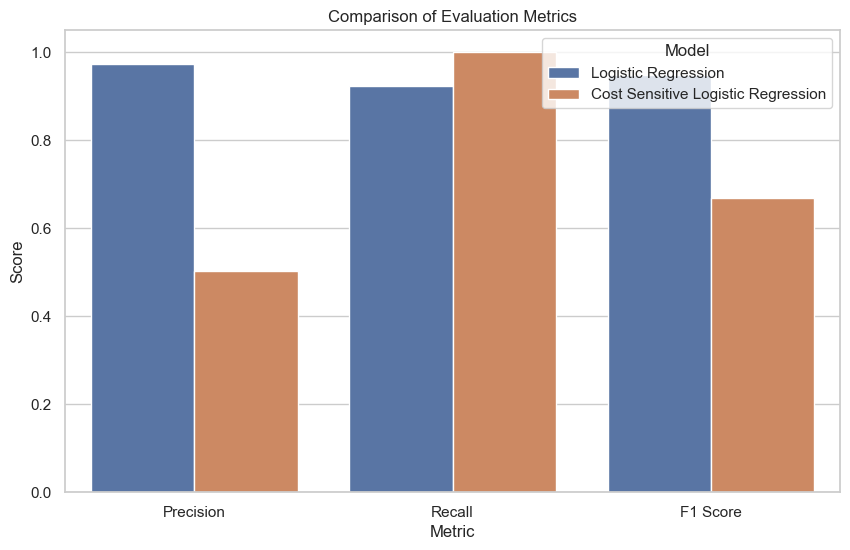

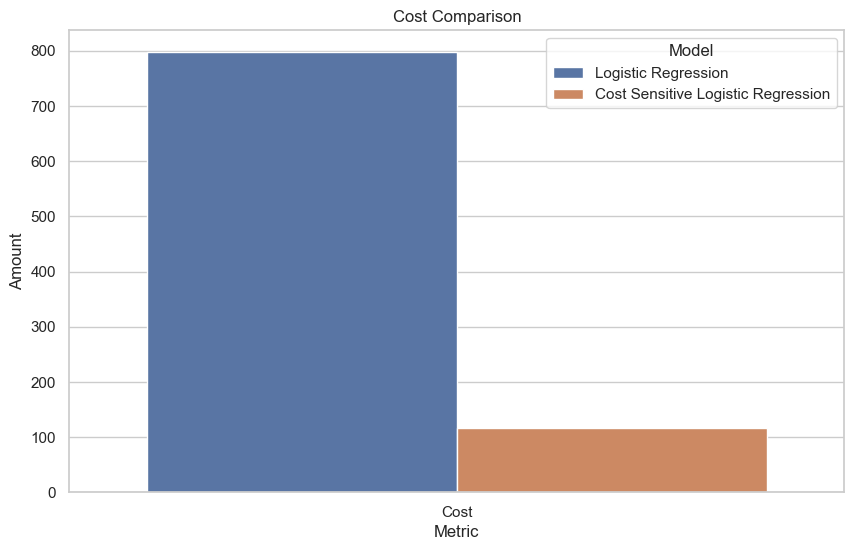

In [46]:


import matplotlib.pyplot as plt
import seaborn as sns


melted_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Value')


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df[melted_df['Metric'].isin(['Precision', 'Recall', 'F1 Score'])])
plt.title('Comparison of Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df[melted_df['Metric'].isin(['Cost'])])
plt.title('Cost Comparison')
plt.ylabel('Amount')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


## Cost Sensitive Decision Trees

In [47]:


dt_grid_cs = DecisionTreeClassifier()


fit_params = {'sample_weight': sample_weights}


dt_grid_cs.fit(X_train_under, y_train_under, **fit_params)


dt_grid = DecisionTreeClassifier()
dt_grid.fit(X_train_under, y_train_under)

prediction_dt = dt_grid.predict(X_test_under)
model_prediction_cost_sensitive_dec_tree = dt_grid_cs.predict(X_test_under)



df_combined= X_test_under.join(pd.DataFrame(y_test_under))

if 'Amount' not in df_combined.columns:
    df_combined = df_combined.join(amount_series, how='left')


print("normal decision tree model cost: ",cost(y_test_under,prediction_dt,df_combined))
conf_mat_dec_tree = confusion_matrix(y_true=y_test_under,
                                         y_pred=prediction_dt)
print('Confusion matrix:\n',conf_mat_dec_tree )
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under,prediction_dt ))


print()
print('#' * 50)

print("cost sensitive decision trees cost: ",cost(y_test_under,model_prediction_cost_sensitive_dec_tree,df_combined))
conf_mat_dec_tree_sensitive = confusion_matrix(y_true=y_test_under,
                                         y_pred=model_prediction_cost_sensitive_dec_tree)
print('Confusion matrix:\n',conf_mat_dec_tree_sensitive )
print('--' * 25)
print('Classification report:\n',
    classification_report(y_test_under, model_prediction_cost_sensitive_dec_tree))

print()
print('#' * 50)

print("saving score for normal model", savings(y_test_under, prediction_dt, df_combined))
print("saving score for cost sensitive model", savings(y_test_under,model_prediction_cost_sensitive_dec_tree , df_combined))


normal decision tree model cost:  958.5999999999999
Confusion matrix:
 [[101  15]
 [  6 111]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       116
           1       0.88      0.95      0.91       117

    accuracy                           0.91       233
   macro avg       0.91      0.91      0.91       233
weighted avg       0.91      0.91      0.91       233


##################################################
cost sensitive decision trees cost:  1204.58
Confusion matrix:
 [[ 99  17]
 [  8 109]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       116
           1       0.87      0.93      0.90       117

    accuracy                           0.89       233
   macro avg       0.90      0.89      0.89       233
weighted avg      

In [48]:
from sklearn.metrics import precision_recall_fscore_support


precision_dt, recall_dt, f1_score_dt, _ = precision_recall_fscore_support(y_test_under, prediction_dt, average='binary')
precision_dt_cs, recall_dt_cs, f1_score_dt_cs, _ = precision_recall_fscore_support(y_test_under, model_prediction_cost_sensitive_dec_tree, average='binary')


cost_dt = cost(y_test_under, prediction_dt, df_combined)
savings_dt = savings(y_test_under, prediction_dt, df_combined)

cost_dt_cs = cost(y_test_under, model_prediction_cost_sensitive_dec_tree, df_combined)
savings_dt_cs = savings(y_test_under, model_prediction_cost_sensitive_dec_tree, df_combined)

metrics_df_dt = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Cost', 'Savings'],
    'Decision Tree': [precision_dt, recall_dt, f1_score_dt, cost_dt, savings_dt],
    'Cost Sensitive Decision Tree': [precision_dt_cs, recall_dt_cs, f1_score_dt_cs, cost_dt_cs, savings_dt_cs]
})


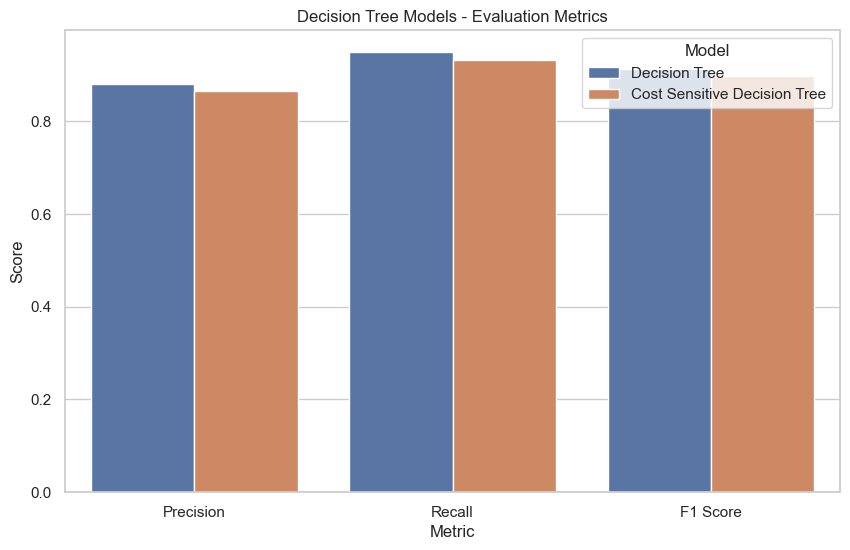

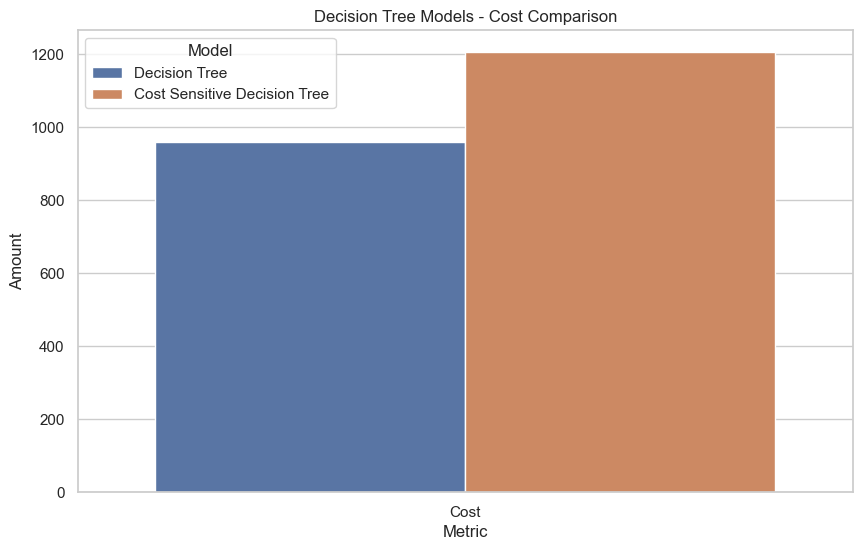

In [49]:

melted_df_dt = metrics_df_dt.melt(id_vars='Metric', var_name='Model', value_name='Value')


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_dt[melted_df_dt['Metric'].isin(['Precision', 'Recall', 'F1 Score'])])
plt.title('Decision Tree Models - Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_dt[melted_df_dt['Metric'].isin(['Cost'])])
plt.title('Decision Tree Models - Cost Comparison')
plt.ylabel('Amount')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


## Cost sensitive Random Forests

In [50]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


rf_cost_sensitive = RandomForestClassifier(random_state=0)
rf_cost_sensitive.fit(X_train_under, y_train_under, sample_weight=sample_weights)

rf_normal = RandomForestClassifier(random_state=0)
rf_normal.fit(X_train_under, y_train_under)


prediction_rf = rf_normal.predict(X_test_under)
model_prediction_cost_sensitive_rf = rf_cost_sensitive.predict(X_test_under)



df_combined= X_test_under.join(pd.DataFrame(y_test_under))

if 'Amount' not in df_combined.columns:
    df_combined = df_combined.join(amount_series, how='left')


print("Normal Random Forest model cost: ", cost(y_test_under, prediction_rf, df_combined))
conf_mat_rf = confusion_matrix(y_true=y_test_under, y_pred=prediction_rf)
print('Confusion matrix:\n', conf_mat_rf)
print('--' * 25)
print('Classification report:\n', classification_report(y_test_under, prediction_rf))

print()
print('#' * 50)

print("Cost sensitive Random Forest model cost: ", cost(y_test_under, model_prediction_cost_sensitive_rf, df_combined))
conf_mat_rf_sensitive = confusion_matrix(y_true=y_test_under, y_pred=model_prediction_cost_sensitive_rf)
print('Confusion matrix:\n', conf_mat_rf_sensitive)
print('--' * 25)
print('Classification report:\n', classification_report(y_test_under, model_prediction_cost_sensitive_rf))
print()
print('#' * 50)

print("saving score for normal model", savings(y_test_under, prediction_rf, df_combined))
print("saving score for cost sensitive model", savings(y_test_under, model_prediction_cost_sensitive_rf, df_combined))



Normal Random Forest model cost:  794.38
Confusion matrix:
 [[108   8]
 [  8 109]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       116
           1       0.93      0.93      0.93       117

    accuracy                           0.93       233
   macro avg       0.93      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233


##################################################
Cost sensitive Random Forest model cost:  1250.6499999999999
Confusion matrix:
 [[110   6]
 [  9 108]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       116
           1       0.95      0.92      0.94       117

    accuracy                           0.94       233
   macro avg       0.94      0.94      0.94       233
weighted avg 

In [51]:

precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test_under, prediction_rf, average='binary')
precision_rf_cs, recall_rf_cs, f1_score_rf_cs, _ = precision_recall_fscore_support(y_test_under, model_prediction_cost_sensitive_rf, average='binary')


cost_rf = cost(y_test_under, prediction_rf, df_combined)
savings_rf = savings(y_test_under, prediction_rf, df_combined)

cost_rf_cs = cost(y_test_under, model_prediction_cost_sensitive_rf, df_combined)
savings_rf_cs = savings(y_test_under, model_prediction_cost_sensitive_rf, df_combined)


metrics_df_rf = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Cost', 'Savings'],
    'Random Forest': [precision_rf, recall_rf, f1_score_rf, cost_rf, savings_rf],
    'Cost Sensitive Random Forest': [precision_rf_cs, recall_rf_cs, f1_score_rf_cs, cost_rf_cs, savings_rf_cs]
})


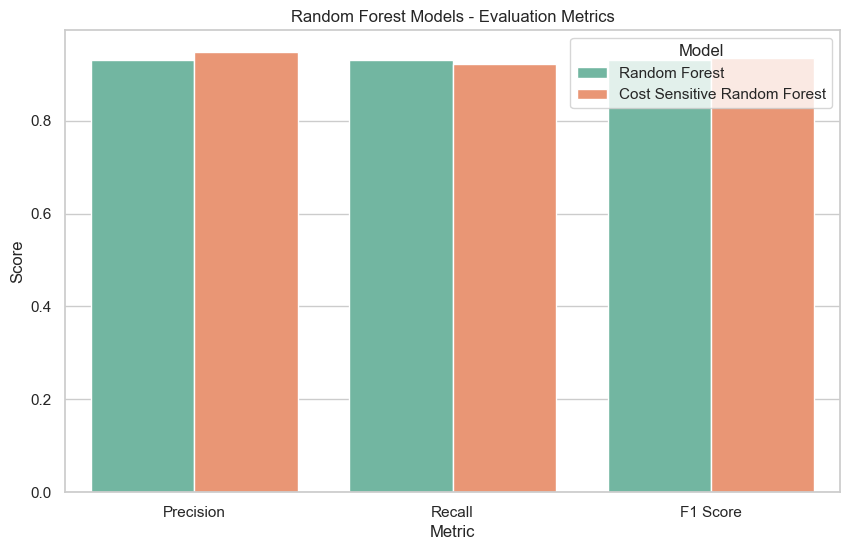

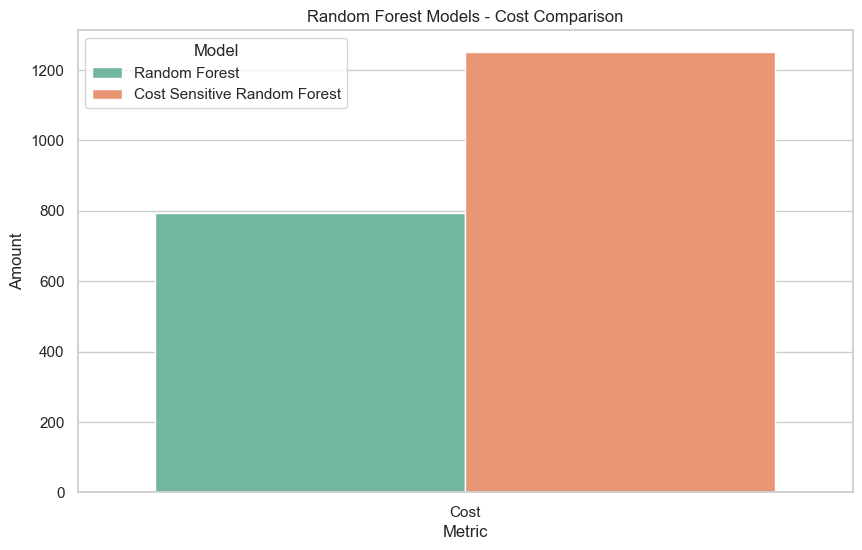

In [52]:

melted_df_rf = metrics_df_rf.melt(id_vars='Metric', var_name='Model', value_name='Value')


sns.set(style="whitegrid")
color_palette = "Set2"  # You can choose a palette like "Set1", "Set2", "Set3", "Paired", "pastel", etc.


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_rf[melted_df_rf['Metric'].isin(['Precision', 'Recall', 'F1 Score'])], palette=color_palette)
plt.title('Random Forest Models - Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_rf[melted_df_rf['Metric'].isin(['Cost'])], palette=color_palette)
plt.title('Random Forest Models - Cost Comparison')
plt.ylabel('Amount')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# XGBoost
xgb_normal = XGBClassifier(random_state=0)
xgb_normal.fit(X_train_under, y_train_under)

xgb_cost_sensitive = XGBClassifier(random_state=0)
xgb_cost_sensitive.fit(X_train_under, y_train_under, sample_weight=sample_weights)


prediction_xgb = xgb_normal.predict(X_test_under)
model_prediction_cost_sensitive_xgb = xgb_cost_sensitive.predict(X_test_under)

df_combined= X_test_under.join(pd.DataFrame(y_test_under))

if 'Amount' not in df_combined.columns:
    df_combined = df_combined.join(amount_series, how='left')

print("Normal XGBoost model cost: ", cost(y_test_under, prediction_xgb, df_combined))
conf_mat_xgb = confusion_matrix(y_true=y_test_under, y_pred=prediction_xgb)
print('Confusion matrix:\n', conf_mat_xgb)
print('--' * 25)
print('Classification report:\n', classification_report(y_test_under, prediction_xgb))

print()
print('#' * 50)

print("Cost sensitive XGBoost model cost: ", cost(y_test_under, model_prediction_cost_sensitive_xgb, df_combined))
conf_mat_xgb_sensitive = confusion_matrix(y_true=y_test_under, y_pred=model_prediction_cost_sensitive_xgb)
print('Confusion matrix:\n', conf_mat_xgb_sensitive)
print('--' * 25)
print('Classification report:\n', classification_report(y_test_under, model_prediction_cost_sensitive_xgb))

print()
print('#' * 50)

print("saving score for normal model", savings(y_test_under, prediction_xgb, df_combined))
print("saving score for cost sensitive model", savings(y_test_under, model_prediction_cost_sensitive_xgb, df_combined))


Normal XGBoost model cost:  802.62
Confusion matrix:
 [[107   9]
 [  8 109]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       116
           1       0.92      0.93      0.93       117

    accuracy                           0.93       233
   macro avg       0.93      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233


##################################################
Cost sensitive XGBoost model cost:  116
Confusion matrix:
 [[  0 116]
 [  0 117]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.50      1.00      0.67       117

    accuracy                           0.50       233
   macro avg       0.25      0.50      0.33       233
weighted avg       0.25      0.50      0

In [54]:

precision_xgb, recall_xgb, f1_score_xgb, _ = precision_recall_fscore_support(y_test_under, prediction_xgb, average='binary')
precision_xgb_cs, recall_xgb_cs, f1_score_xgb_cs, _ = precision_recall_fscore_support(y_test_under, model_prediction_cost_sensitive_xgb, average='binary')


cost_xgb = cost(y_test_under, prediction_xgb, df_combined)
savings_xgb = savings(y_test_under, prediction_xgb, df_combined)

cost_xgb_cs = cost(y_test_under, model_prediction_cost_sensitive_xgb, df_combined)
savings_xgb_cs = savings(y_test_under, model_prediction_cost_sensitive_xgb, df_combined)


metrics_df_xgb = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Cost', 'Savings'],
    'XGBoost': [precision_xgb, recall_xgb, f1_score_xgb, cost_xgb, savings_xgb],
    'Cost Sensitive XGBoost': [precision_xgb_cs, recall_xgb_cs, f1_score_xgb_cs, cost_xgb_cs, savings_xgb_cs]
})


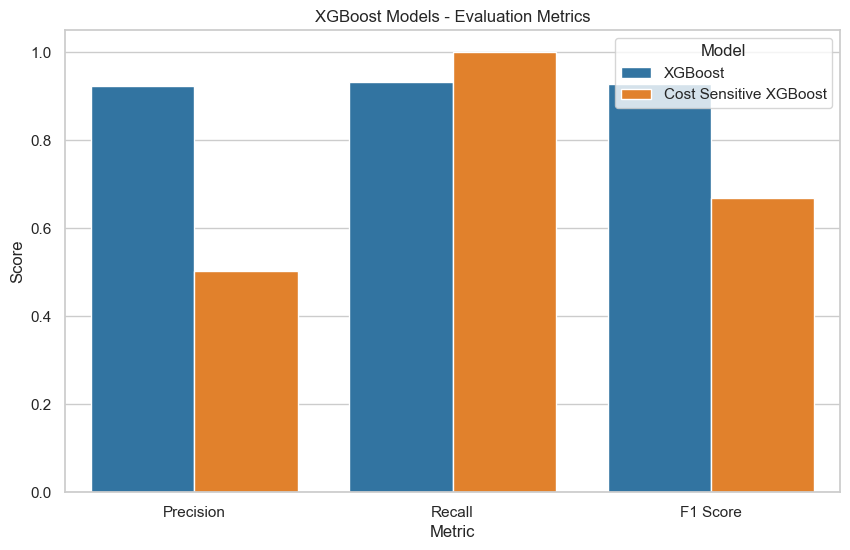

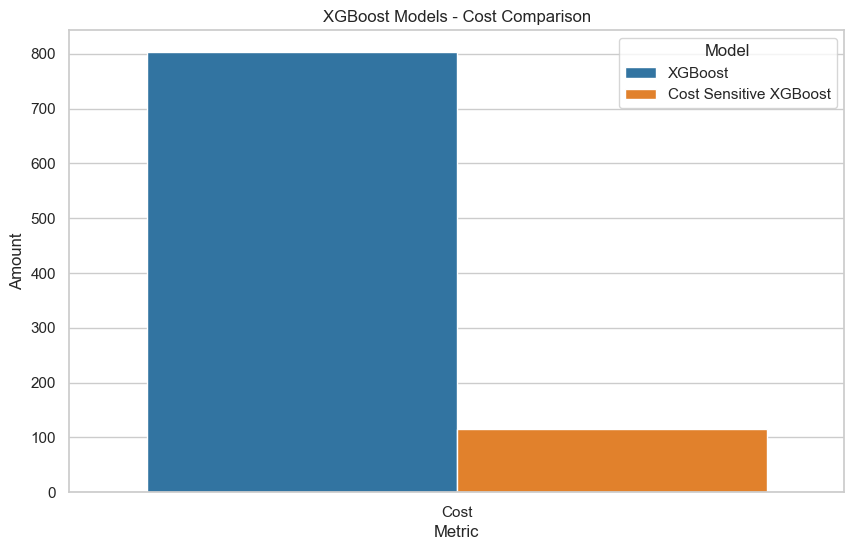

In [55]:

melted_df_xgb = metrics_df_xgb.melt(id_vars='Metric', var_name='Model', value_name='Value')


sns.set(style="whitegrid")
color_palette = "tab10"  # A high-quality color palette like "tab10", "tab20", "deep", etc.


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_xgb[melted_df_xgb['Metric'].isin(['Precision', 'Recall', 'F1 Score'])], palette=color_palette)
plt.title('XGBoost Models - Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df_xgb[melted_df_xgb['Metric'].isin(['Cost'])], palette=color_palette)
plt.title('XGBoost Models - Cost Comparison')
plt.ylabel('Amount')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


## Plots comparing all results

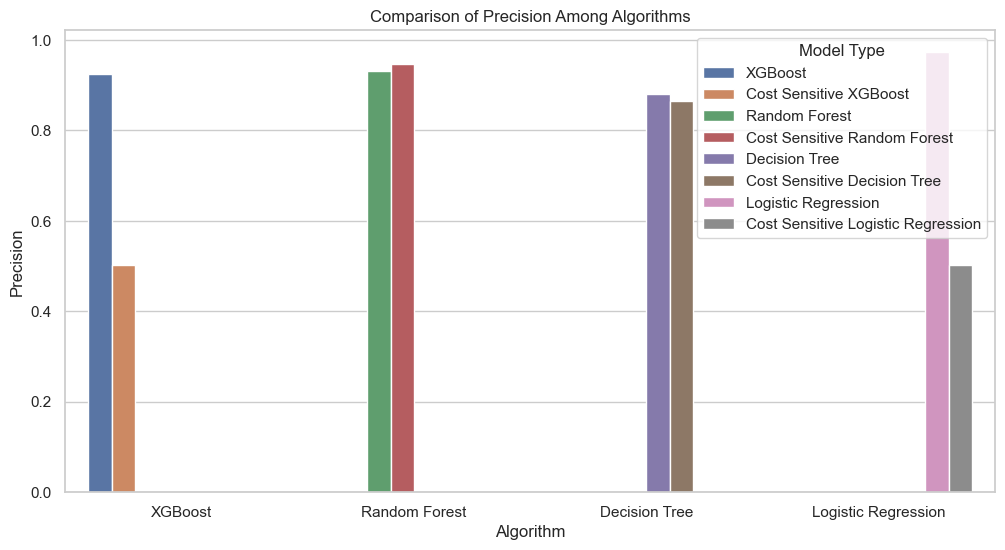

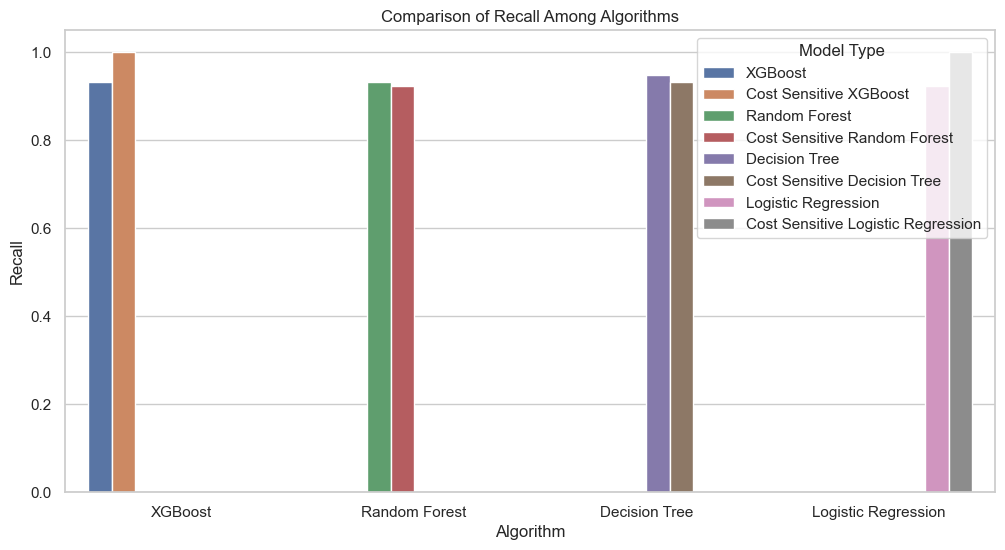

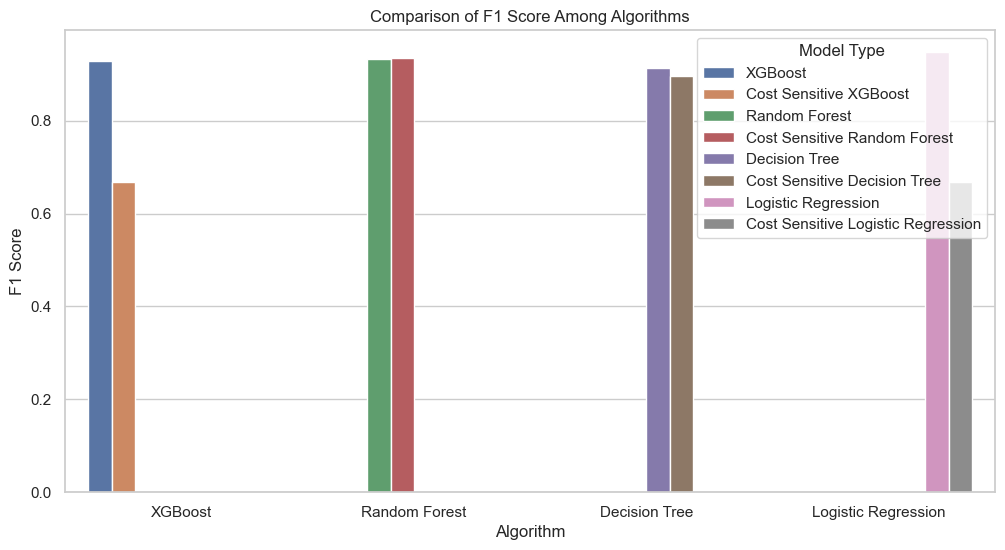

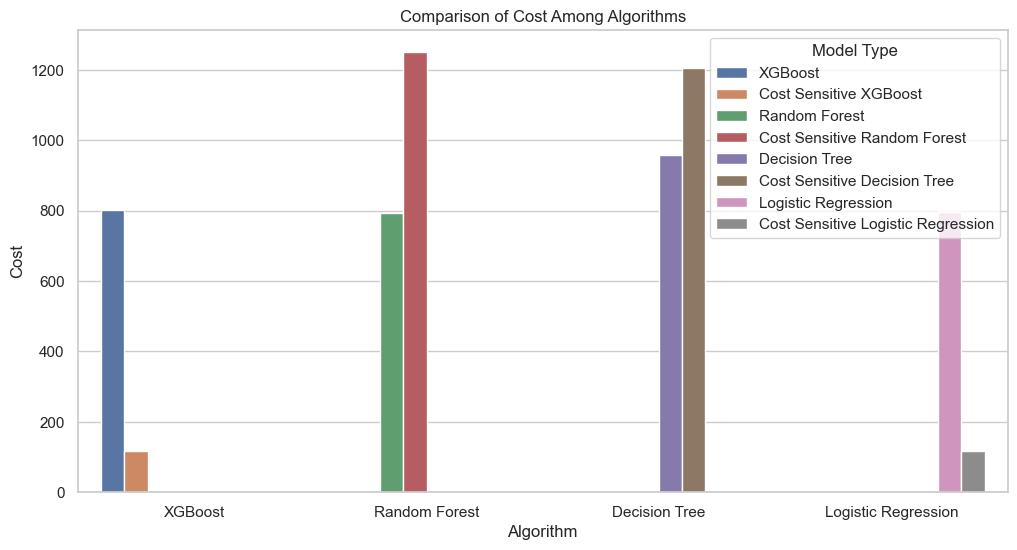

In [56]:

metrics_df_xgb['Algorithm'] = 'XGBoost'
metrics_df_rf['Algorithm'] = 'Random Forest'
metrics_df_dt['Algorithm'] = 'Decision Tree'
metrics_df['Algorithm'] = 'Logistic Regression'  # Assuming 'metrics_df' is for Logistic Regression


combined_metrics_df = pd.concat([metrics_df_xgb, metrics_df_rf, metrics_df_dt, metrics_df])




melted_metrics_df = combined_metrics_df.melt(id_vars=['Metric', 'Algorithm'], var_name='Model', value_name='Value')





for metric in ['Precision', 'Recall', 'F1 Score', 'Cost']:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Algorithm', y='Value', hue='Model', data=melted_metrics_df[melted_metrics_df['Metric'] == metric])
    plt.title(f'Comparison of {metric} Among Algorithms')
    plt.ylabel(metric)
    plt.xlabel('Algorithm')
    plt.legend(title='Model Type')
    plt.show()


# Unsupervised Learning Techniques for Fraud Detection

# Self Organised Maps


No assumptions regarding the distribution of variables

Dependent structure among variables

Dealing with nonlinear structure

Coping with noisy and missing data

In [57]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
scaled_fraud = standard.fit_transform(X_train_under)

from sklearn_som.som import SOM
som = SOM(m=2, n=1, dim=scaled_fraud.shape[1], random_state=0) 
som.fit(scaled_fraud)

scaled_fraud_x_test = standard.fit_transform(X_test_under)


predictions_som = som.predict(np.array(scaled_fraud_x_test))


print('Classification report:\n',
               classification_report(y_test_under, predictions_som))


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.25      0.32      0.28       117

    accuracy                           0.16       233
   macro avg       0.12      0.16      0.14       233
weighted avg       0.12      0.16      0.14       233



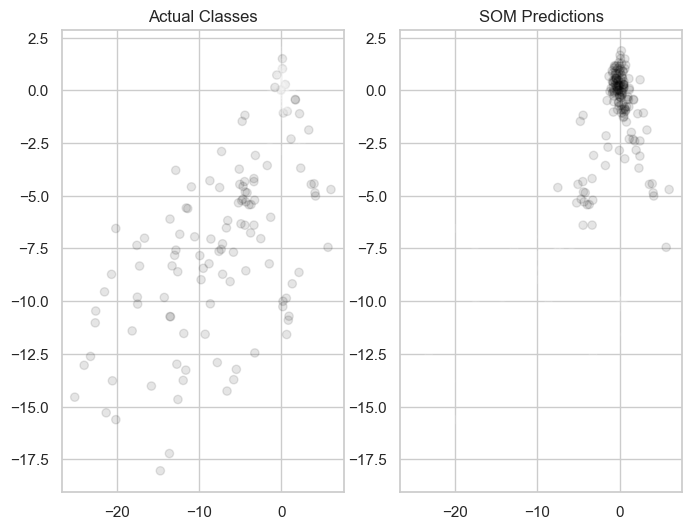

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
x = X_test_under['V17']
y = X_test_under['V14']

ax[0].scatter(x, y, alpha=0.1, cmap='Greys', c=y_test_under)
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, alpha=0.1, cmap='Greys', c=predictions_som)
ax[1].title.set_text('SOM Predictions')

In [61]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np




standard = StandardScaler()
scaled_fraud = standard.fit_transform(X_train_under)


from sklearn_som.som import SOM
som = SOM(m=2, n=1, dim=scaled_fraud.shape[1], random_state=0) 
som.fit(scaled_fraud)


scaled_fraud_x_test = standard.transform(X_test_under)  # Use transform instead of fit_transform


predictions_som = som.predict(np.array(scaled_fraud_x_test))


print('Classification report:\n', classification_report(y_test_under, predictions_som))




df_combined = X_test_under.join(pd.DataFrame(y_test_under))
if 'Amount' not in df_combined.columns:
    df_combined = df_combined.join(amount_series, how='left')


cost_som = cost(y_test_under, predictions_som, df_combined)
savings_som = savings(y_test_under, predictions_som, df_combined)


print("SOM model cost: ", cost_som)
print("SOM model savings: ", savings_som)


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.20      0.25      0.22       117

    accuracy                           0.12       233
   macro avg       0.10      0.12      0.11       233
weighted avg       0.10      0.12      0.11       233

SOM model cost:  9868.67
SOM model savings:  84.07474137931034
